<a href="https://colab.research.google.com/github/w-okada/yolox-onnx-test/blob/master/YOLOX_Resolution_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLOX Resolution Test
Test with images with various resolution. Note, YOLOX is nano. 

In [1]:
import math
import glob
import matplotlib.pyplot as plt
import cv2

# Clone yolox repository and download weight(nano)

In [2]:
!git clone https://github.com/Megvii-BaseDetection/YOLOX.git &> /dev/null
%cd YOLOX
!git checkout d9422393113ffcd381a533e91720bee96652477d &> /dev/null
!wget https://github.com/Megvii-BaseDetection/YOLOX/releases/download/0.1.1rc0/yolox_nano.pth   &> /dev/null
#!pip3 install -v -e . 
!pip install loguru &> /dev/null
!pip install thop  &> /dev/null

/content/YOLOX


#Download Sample data

In [3]:
!git clone --quiet https://github.com/w-okada/yolox-onnx-test.git  &> /dev/null
!cp yolox-onnx-test/data/D0002011239_00000.jpg ./sample.jpg

# Inference with original weight for various resolution

In [4]:
!rm -rf ./YOLOX_outputs/yolox_nano/vis_res
img_sizes = [160, 320, 640, 1280, 1920]

for img_size in img_sizes:
  print("processing... resolution:", img_size)
  !PYTHONPATH=. python tools/demo.py image -expn nano{img_size} -n yolox-nano -c yolox_nano.pth  --path sample.jpg --conf 0.25 --nms 0.45 --tsize {img_size} --save_result --device cpu



processing... resolution: 160
2022-11-26 07:47:58.447 | INFO     | __main__:main:259 - Args: Namespace(camid=0, ckpt='yolox_nano.pth', conf=0.25, demo='image', device='cpu', exp_file=None, experiment_name='nano160', fp16=False, fuse=False, legacy=False, name='yolox-nano', nms=0.45, path='sample.jpg', save_result=True, trt=False, tsize=160)
2022-11-26 07:47:58.644 | INFO     | __main__:main:269 - Model Summary: Params: 0.91M, Gflops: 0.16
2022-11-26 07:47:58.646 | INFO     | __main__:main:282 - loading checkpoint
2022-11-26 07:47:58.720 | INFO     | __main__:main:286 - loaded checkpoint done.
2022-11-26 07:47:58.746 | INFO     | __main__:inference:165 - Infer time: 0.0207s
2022-11-26 07:47:58.747 | INFO     | __main__:image_demo:202 - Saving detection result in ./YOLOX_outputs/nano160/vis_res/2022_11_26_07_47_58/sample.jpg
processing... resolution: 320
2022-11-26 07:47:59.851 | INFO     | __main__:main:259 - Args: Namespace(camid=0, ckpt='yolox_nano.pth', conf=0.25, demo='image', device

# Show result

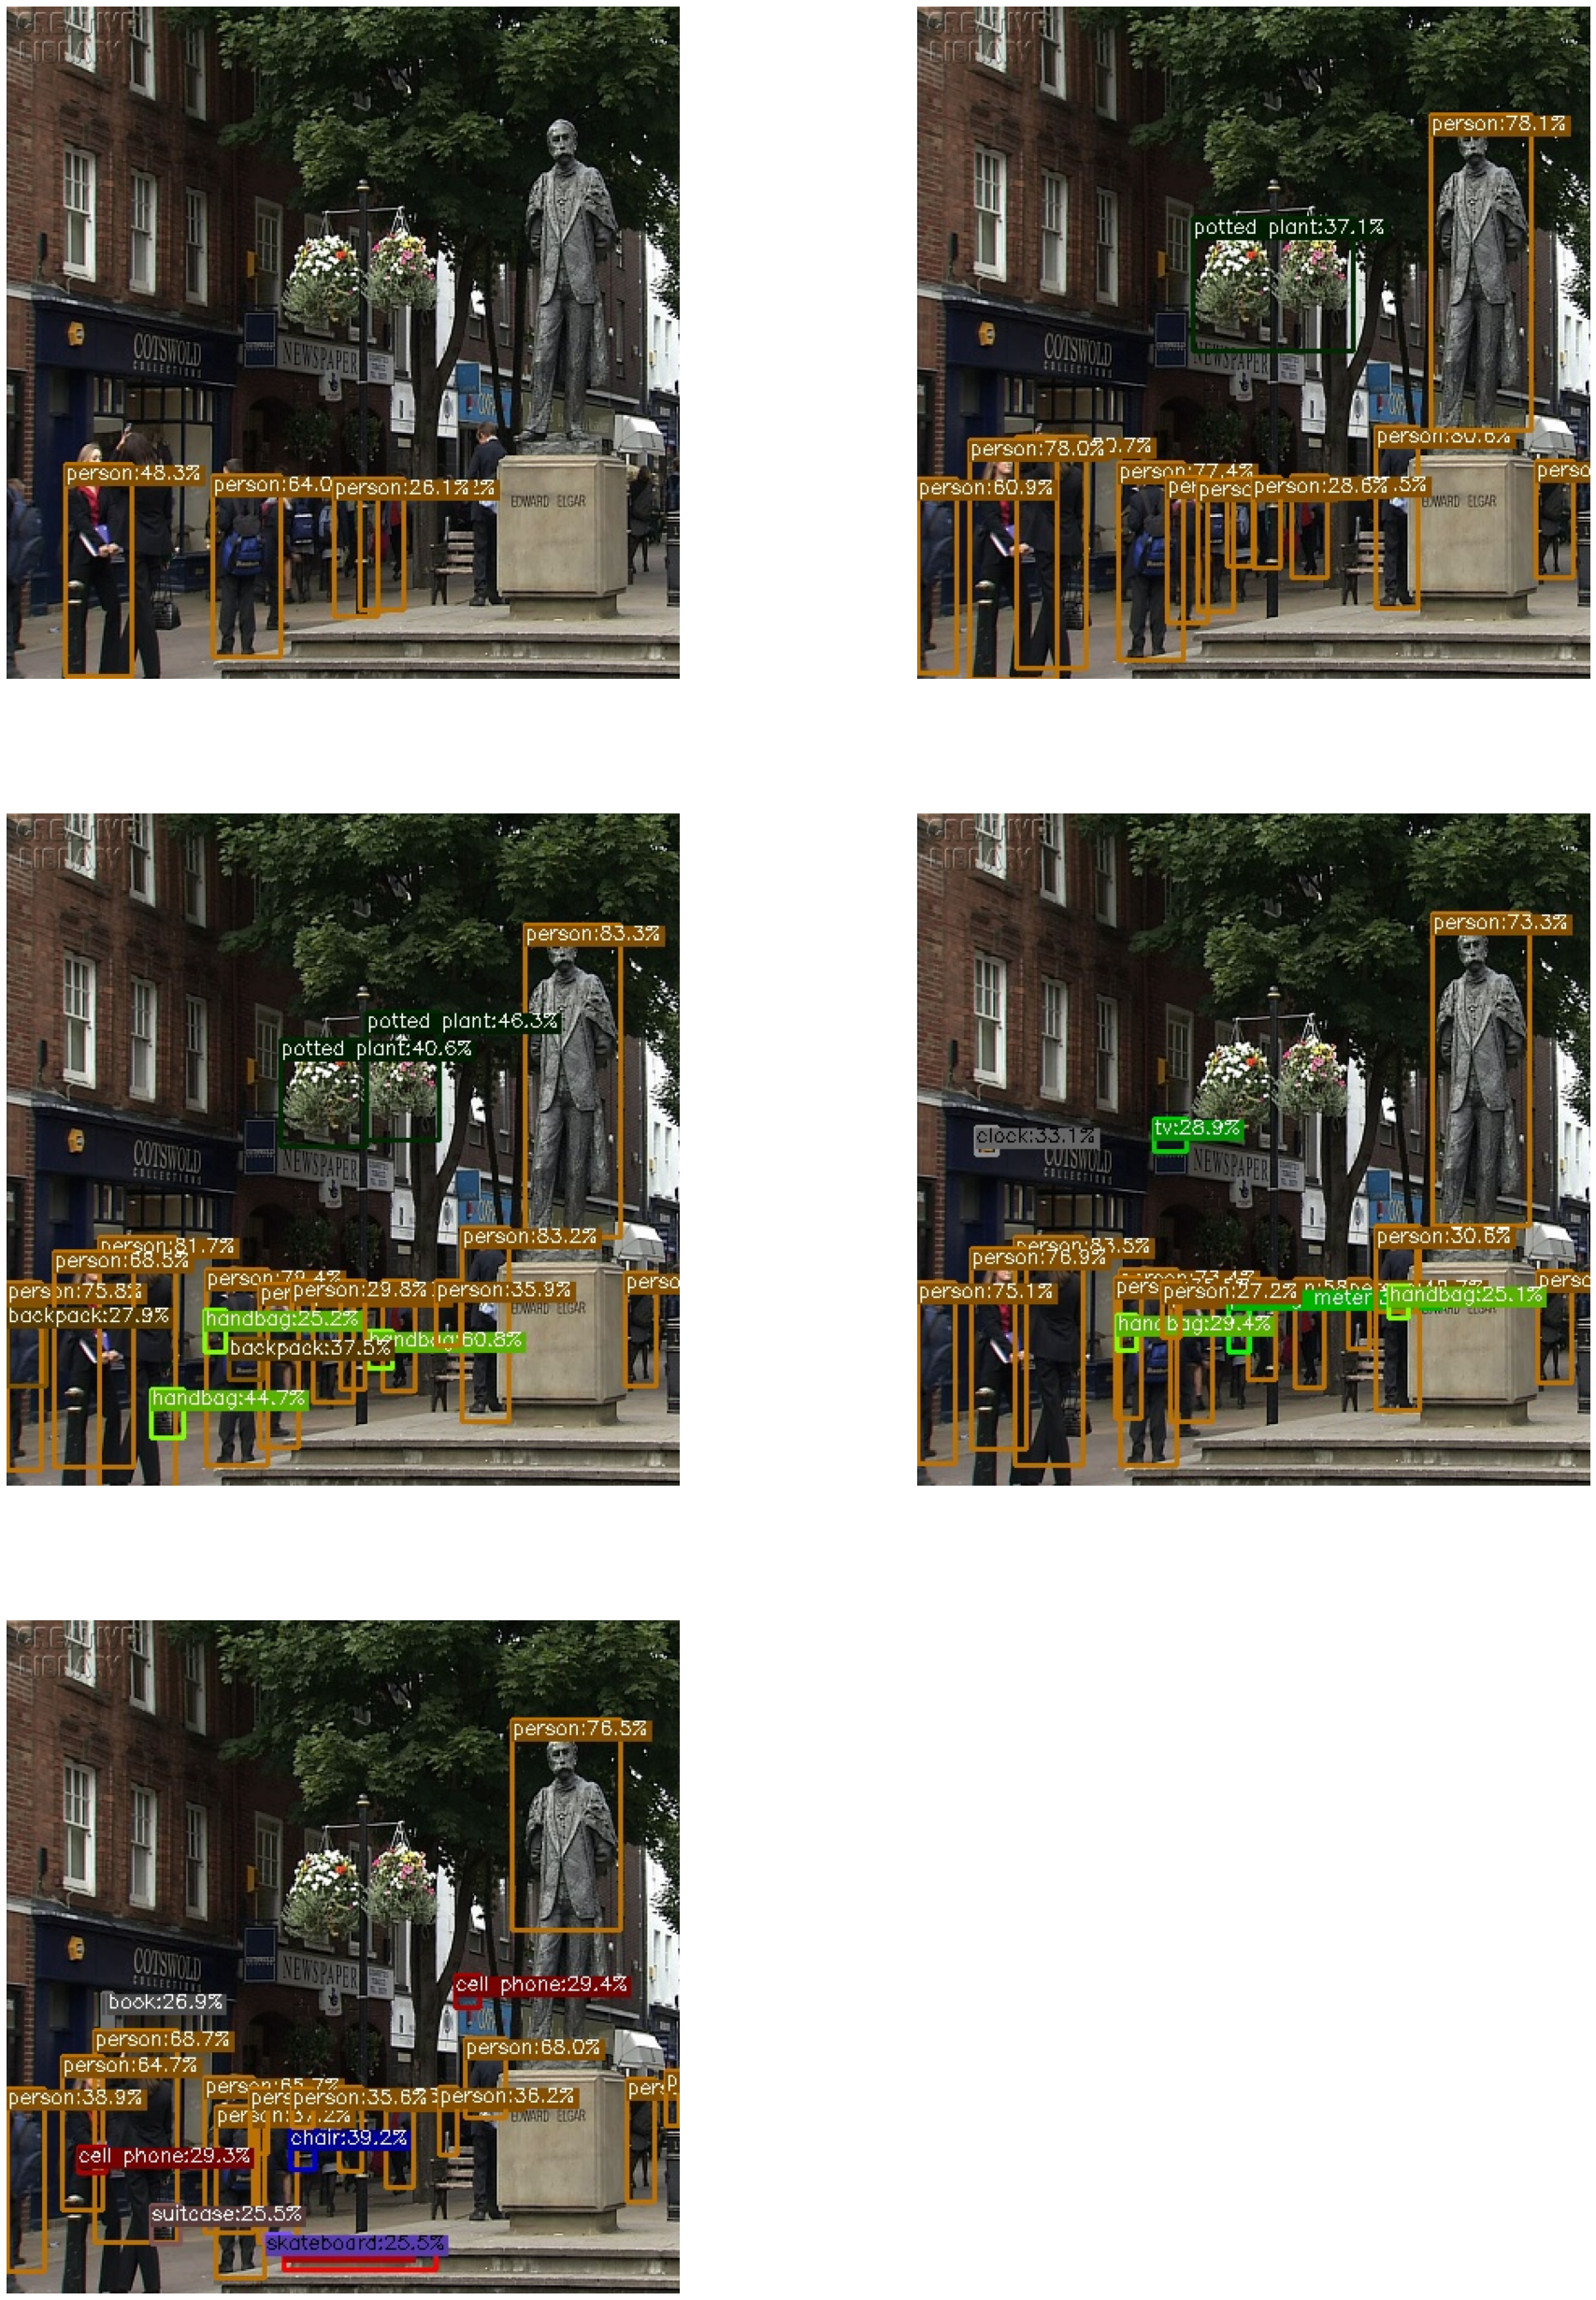

In [5]:
rows = math.ceil(len(img_sizes) / 2)
fig1 = plt.figure(figsize=(32,15*rows))
for i, img_size in enumerate(img_sizes):
  ax = fig1.add_subplot(rows, 2, i+1)
  files = glob.glob(f"./YOLOX_outputs/nano{img_size}/vis_res/*/sample.jpg")
  img = cv2.imread(files[0])  
  ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  # # ax.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
  ax.axis('off')